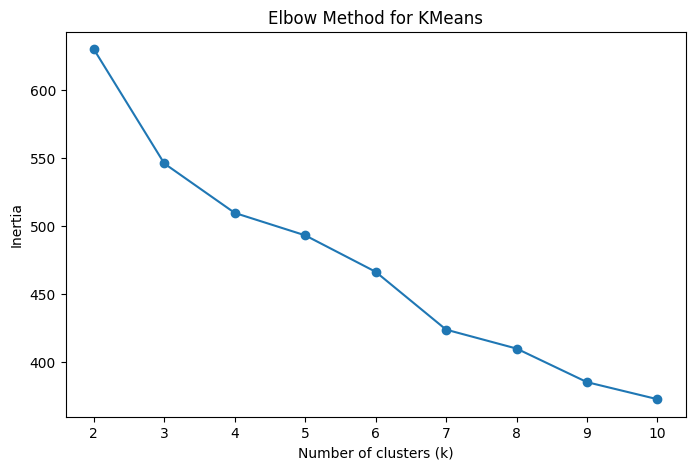

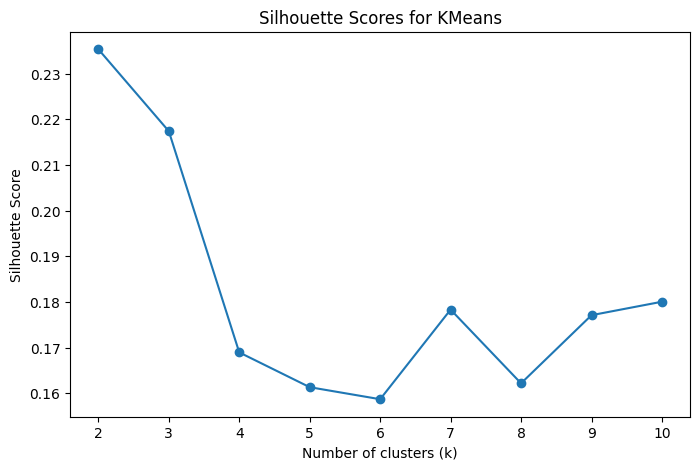

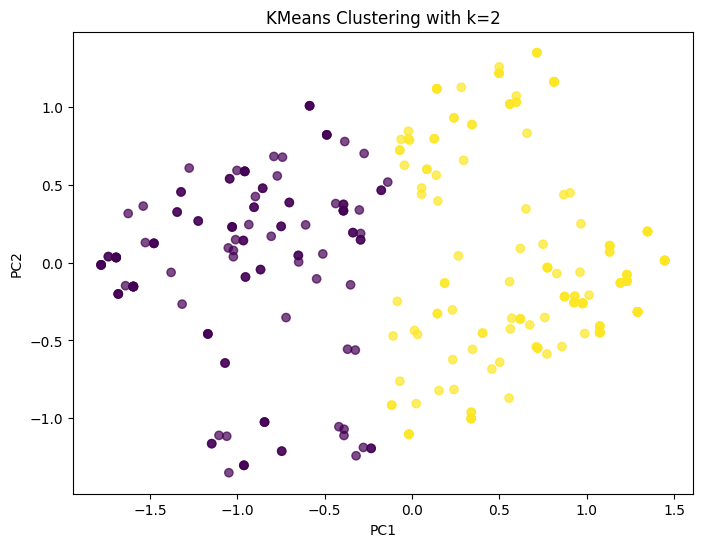

Contingency table between clusters and target:
target    0    1
row_0           
0        20  109
1       144   30


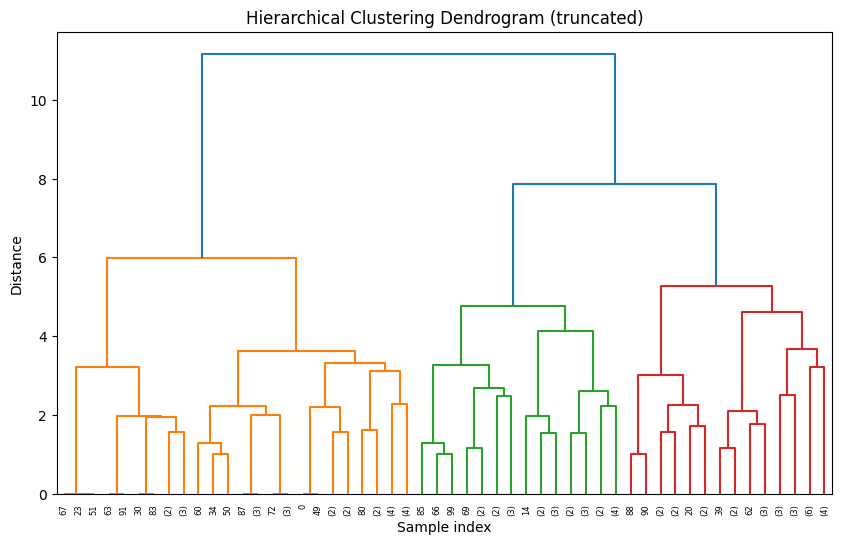

In [1]:
# ===== Imports =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA

# ===== Load data =====
df = pd.read_csv("data/heart_disease_selected.csv")

# تحويل target إلى binary زي قبل
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

X = df.drop("target", axis=1)
y = df["target"]

# ===== اختيار تمثيل أبسط بالـ PCA (للتصوير فقط) =====
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# ===== 1. K-Means =====
inertias = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X, km.labels_))

# Elbow method
plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.show()

# Silhouette scores
plt.figure(figsize=(8,5))
plt.plot(K_range, sil_scores, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for KMeans")
plt.show()

# Fit KMeans with best k (مثلاً 2)
best_k = 2
km = KMeans(n_clusters=best_k, random_state=42)
labels = km.fit_predict(X)

# Visualization with PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis", alpha=0.7)
plt.title(f"KMeans Clustering with k={best_k}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# مقارنة clusters مع target
contingency = pd.crosstab(labels, y)
print("Contingency table between clusters and target:")
print(contingency)

# ===== 2. Hierarchical Clustering =====
# نشتغل على عينة صغيرة عشان الرسم
sample = X.sample(100, random_state=42)
Z = linkage(sample, method="ward")

plt.figure(figsize=(10,6))
dendrogram(Z, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()
